In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Clustering Analysis**

KMeans clustering will be used.

In [70]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'indigo',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

In [71]:
data = pd.read_csv("../data/full_merged_data.csv")

In [72]:
data_copied = data.copy()

In [73]:
data_copied.isna().sum()

vehicle_id      0
vehicle_type    0
vehicle_desc    0
make_id         0
make_name       0
make_type       0
model_year      0
color           0
date_stolen     0
year_stolen     0
month_stolen    0
location_id     0
region          0
country         0
population      0
density         0
area            0
dtype: int64

In [74]:
# Checking for duplicates
print(f"How many duplicates: {data_copied.duplicated().sum()}")

How many duplicates: 0


In [75]:
print(f"data_copied shape: {data_copied.shape}\n")
print(f"data_copied dimension: {data_copied.ndim}\n")
print(f"data_copied data types: \n{data_copied.dtypes}")
data_copied.head()

data_copied shape: (4509, 17)

data_copied dimension: 2

data_copied data types: 
vehicle_id        int64
vehicle_type     object
vehicle_desc     object
make_id           int64
make_name        object
make_type        object
model_year        int64
color            object
date_stolen      object
year_stolen       int64
month_stolen     object
location_id       int64
region           object
country          object
population        int64
density         float64
area            float64
dtype: object


,vehicle_id,vehicle_type,vehicle_desc,make_id,make_name,make_type,model_year,color,date_stolen,year_stolen,month_stolen,location_id,region,country,population,density,area
0,1,Trailer,BST2021D,623,Trailer,Standard,2021,Silver,2021-11-05,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978
1,3,Boat Trailer,ASD JETSKI,623,Trailer,Standard,2021,Silver,2022-02-13,2022,Feburary,102,Auckland,New Zealand,1695200,343.09,4940.978
2,5,Trailer,D-MAX 8X5,623,Trailer,Standard,2018,Silver,2022-01-10,2022,January,102,Auckland,New Zealand,1695200,343.09,4940.978
3,17,Trailer,BSTB85B,623,Trailer,Standard,2021,Silver,2021-10-10,2021,October,102,Auckland,New Zealand,1695200,343.09,4940.978
4,24,Trailer - Heavy,CT DIG 25,623,Trailer,Standard,2021,Silver,2021-11-12,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978


In [76]:
columns_to_drop = ['vehicle_id','location_id',"make_id",'date_stolen','country']
data_copied.drop(columns=columns_to_drop,inplace=True)

In [77]:
print(f"data_copied shape: {data_copied.shape}\n")
print(f"data_copied dimension: {data_copied.ndim}\n")
print(f"data_copied data types: \n{data_copied.dtypes}")
data_copied.head()

data_copied shape: (4509, 12)

data_copied dimension: 2

data_copied data types: 
vehicle_type     object
vehicle_desc     object
make_name        object
make_type        object
model_year        int64
color            object
year_stolen       int64
month_stolen     object
region           object
population        int64
density         float64
area            float64
dtype: object


,vehicle_type,vehicle_desc,make_name,make_type,model_year,color,year_stolen,month_stolen,region,population,density,area
0,Trailer,BST2021D,Trailer,Standard,2021,Silver,2021,November,Auckland,1695200,343.09,4940.978
1,Boat Trailer,ASD JETSKI,Trailer,Standard,2021,Silver,2022,Feburary,Auckland,1695200,343.09,4940.978
2,Trailer,D-MAX 8X5,Trailer,Standard,2018,Silver,2022,January,Auckland,1695200,343.09,4940.978
3,Trailer,BSTB85B,Trailer,Standard,2021,Silver,2021,October,Auckland,1695200,343.09,4940.978
4,Trailer - Heavy,CT DIG 25,Trailer,Standard,2021,Silver,2021,November,Auckland,1695200,343.09,4940.978


**Clustering analysis**
- Use get dummies
- Scaled
- Pca
- Clustering analysis
- Tie everything into a pipeline
- Further clustering analysis
- Append cluster values back into a copy of the original data
- Perform EDA on clusters

**Get Dummies**

In [78]:
data_copied2 = data_copied.copy()
columns_dummies = ['vehicle_type','vehicle_desc','make_name',
                   'make_type','color','month_stolen','region']
data_dummy = pd.get_dummies(data_copied2,columns=columns_dummies,drop_first=True)

In [79]:
data_dummy.head()

,model_year,year_stolen,population,density,area,vehicle_type_Articulated Truck,vehicle_type_Boat Trailer,vehicle_type_Cab and Chassis Only,vehicle_type_Caravan,vehicle_type_Convertible,...,region_Gisborne,region_Hawke's Bay,region_Manawatū-Whanganui,region_Nelson,region_Northland,region_Otago,region_Southland,region_Taranaki,region_Waikato,region_Wellington
0,2021,2021,1695200,343.09,4940.978,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,2022,1695200,343.09,4940.978,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,2022,1695200,343.09,4940.978,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,2021,1695200,343.09,4940.978,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,2021,1695200,343.09,4940.978,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
columns_ = data_dummy.columns.to_list()
print(columns_)
print(len(columns_))

['model_year', 'year_stolen', 'population', 'density', 'area', 'vehicle_type_Articulated Truck', 'vehicle_type_Boat Trailer', 'vehicle_type_Cab and Chassis Only', 'vehicle_type_Caravan', 'vehicle_type_Convertible', 'vehicle_type_Flat Deck Truck', 'vehicle_type_Hatchback', 'vehicle_type_Heavy Van', 'vehicle_type_Light Bus', 'vehicle_type_Light Van', 'vehicle_type_Mobile Home - Light', 'vehicle_type_Mobile Machine', 'vehicle_type_Moped', 'vehicle_type_Other Truck', 'vehicle_type_Roadbike', 'vehicle_type_Saloon', 'vehicle_type_Special Purpose Vehicle', 'vehicle_type_Sports Car', 'vehicle_type_Stationwagon', 'vehicle_type_Tractor', 'vehicle_type_Trail Bike', 'vehicle_type_Trailer', 'vehicle_type_Trailer - Heavy', 'vehicle_type_Utility', 'vehicle_desc_10 X 5', 'vehicle_desc_10 X 5 TANDEM', 'vehicle_desc_10X5 TANDEM', 'vehicle_desc_116I', 'vehicle_desc_118I', 'vehicle_desc_11X5', 'vehicle_desc_120I', 'vehicle_desc_1290', 'vehicle_desc_130I', 'vehicle_desc_14X6.6 SALV', 'vehicle_desc_150', 'v

In [81]:
to_transform = data_dummy.columns.to_list()[:4]
print(to_transform)
indexes = [columns_.index(value) for value in to_transform]
print(indexes)

['model_year', 'year_stolen', 'population', 'density']
[0, 1, 2, 3]


**Scale and PCA**

In [82]:
from sklearn.decomposition import  PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [83]:
data_clustering = data_dummy.copy()

In [84]:
scaler = StandardScaler()

In [85]:
ct1 = ColumnTransformer([
    ('scale',scaler,indexes)],
    remainder='passthrough')

In [86]:
# scaling
normalise_scaled = ct1.fit_transform(data_clustering)
# pca
pca = PCA().fit(normalise_scaled)
pca_data = pca.transform(normalise_scaled)

Text(0.5, 1.0, 'StandardScaler')

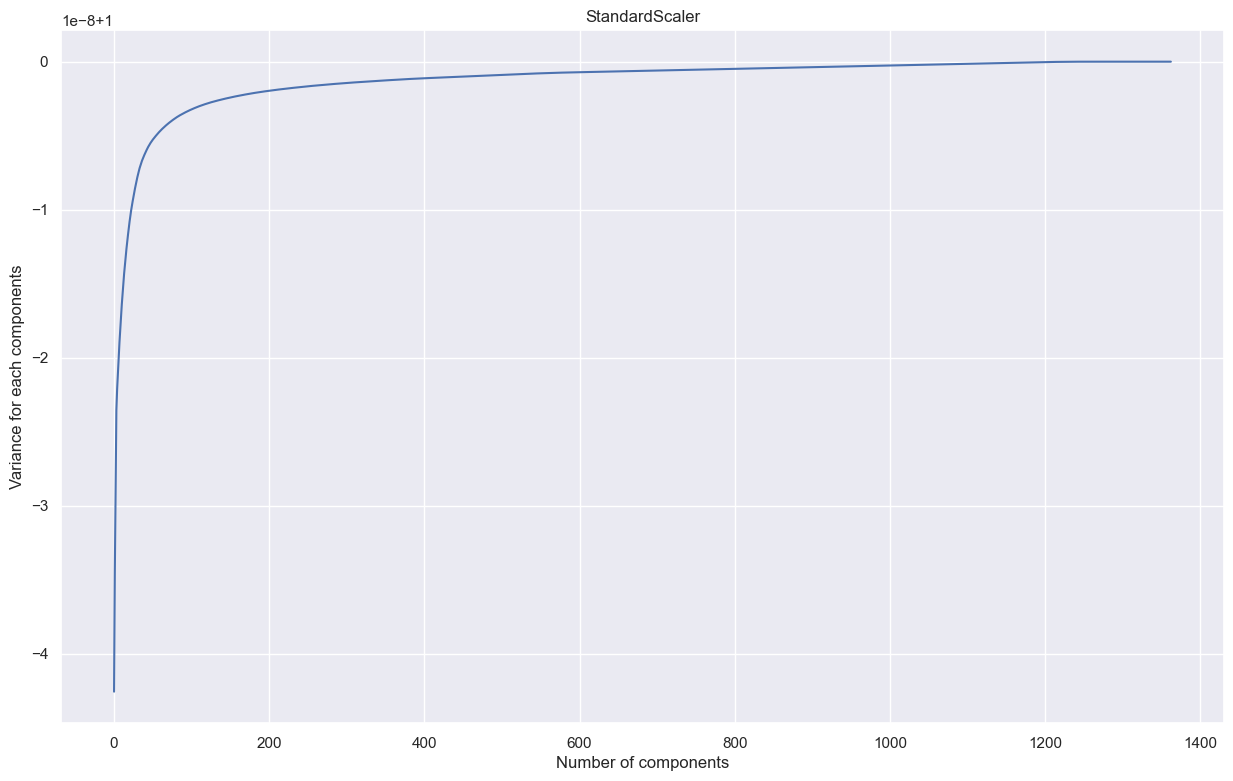

In [90]:
# plotting the cumulative summation of the explained variance
sns.set_theme(style='darkgrid')
fig,ax = plt.subplots(figsize=(15,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance for each components')
ax.set_title("StandardScaler")

In [92]:
exp_var_cumsum = pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)

for index,var in enumerate(exp_var_cumsum):
    print(f'If pca components is: {index}    Variance: {np.around(var,3)}')



If pca components is: 0    Variance: 100.0
If pca components is: 1    Variance: 100.0
If pca components is: 2    Variance: 100.0
If pca components is: 3    Variance: 100.0
If pca components is: 4    Variance: 100.0
If pca components is: 5    Variance: 100.0
If pca components is: 6    Variance: 100.0
If pca components is: 7    Variance: 100.0
If pca components is: 8    Variance: 100.0
If pca components is: 9    Variance: 100.0
If pca components is: 10    Variance: 100.0
If pca components is: 11    Variance: 100.0
If pca components is: 12    Variance: 100.0
If pca components is: 13    Variance: 100.0
If pca components is: 14    Variance: 100.0
If pca components is: 15    Variance: 100.0
If pca components is: 16    Variance: 100.0
If pca components is: 17    Variance: 100.0
If pca components is: 18    Variance: 100.0
If pca components is: 19    Variance: 100.0
If pca components is: 20    Variance: 100.0
If pca components is: 21    Variance: 100.0
If pca components is: 22    Variance: 100.

In [95]:
# # Plotting the variances for each PC
# sns.set_theme(style='whitegrid')
# fig = plt.subplots(figsize=(20,10))
# PC = range(1, pca.n_components_+1)
# plt.bar(PC, pca.explained_variance_ratio_, color='red')
# plt.xlabel('Principal Components')
# plt.xticks(rotation=1)
# plt.ylabel('Variance %')
# plt.xticks(PC,rotation=90)
# plt.grid()
# plt.title("StandardScaler")

All components explain the data, will proceed with the normalised data 

**Clustering analysis with Yellow Brick**

In [97]:
# Pipeline
from sklearn.pipeline import Pipeline
# Clustering algo
from sklearn.cluster import KMeans
# Evaluation
from yellowbrick.cluster import KElbowVisualizer

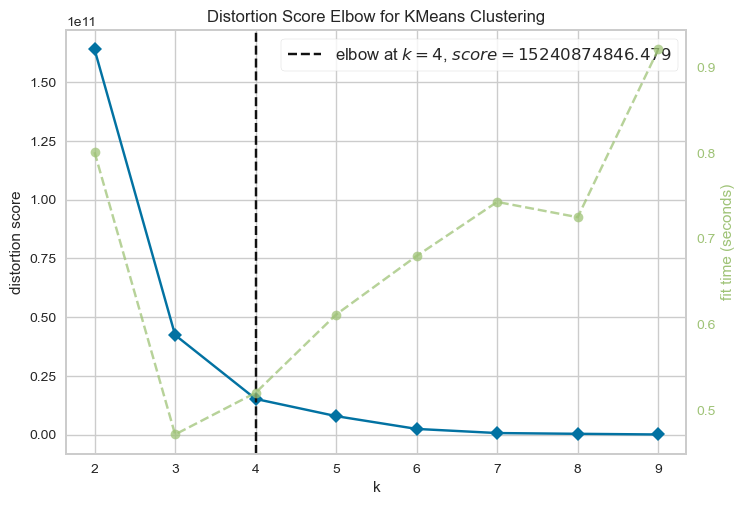

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
# Testing a range of clustering values
kmeans = KMeans()
visualiser = KElbowVisualizer(kmeans,k=(2,10),metric="distortion")
visualiser.fit(normalise_scaled)
visualiser.show()

In [99]:
k_data = {
    "k_value": visualiser.k_values_,
    "k_scores":visualiser.k_scores_
}
Elbow_values = pd.DataFrame(k_data)
Elbow_values

,k_value,k_scores
0,2,1.639317e+11
1,3,4.243017e+10
2,4,1.524087e+10
3,5,7.919643e+09
4,6,2.480183e+09
5,7,7.206837e+08
6,8,4.003290e+08
7,9,1.185822e+08


Proceed with cluster size of 4 and make use of a pipeline

**Tying everything to a pipeline**

In [100]:
# Would use a k value of 4
my_pipe = Pipeline(
    [
        ("my_column_transformer",ct1),
        ("kmeans_clustering",KMeans(n_clusters=4))
    ]
)

In [101]:
result  = my_pipe.fit(data_clustering)

In [119]:
my_clusters = result.named_steps['kmeans_clustering']
print(my_clusters)
print(my_clusters.labels_.tolist()[:5])
print(my_clusters.cluster_centers_[:1])

KMeans(n_clusters=4)
[0, 0, 0, 0, 0]
[[1.14193520e-01 5.03071063e-02 5.87508881e-01 ... 4.64152507e-02
  8.32667268e-17 1.72813925e-01]]


In [107]:
normalise_scaled[:1]

array([[ 1.74268178, -1.31696032,  1.2916412 , ...,  0.        ,
         0.        ,  0.        ]])

In [108]:
scaled_data = result.named_steps['my_column_transformer'].transform(data_clustering)
scaled_data[:1]

array([[ 1.74268178, -1.31696032,  1.2916412 , ...,  0.        ,
         0.        ,  0.        ]])

**Further clustering analysis**

In [120]:
from collections import Counter
Counter(my_clusters.labels_)

Counter({0: 2413, 3: 775, 1: 657, 2: 664})

In [123]:
scaled_data[:1]

array([[ 1.74268178, -1.31696032,  1.2916412 , ...,  0.        ,
         0.        ,  0.        ]])

In [125]:
scaled_data_frame = pd.DataFrame(scaled_data)
scaled_data_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362
0,1.742682,-1.316960,1.291641,1.322819,4940.978,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.742682,0.759324,1.291641,1.322819,4940.978,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.409632,0.759324,1.291641,1.322819,4940.978,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.742682,-1.316960,1.291641,1.322819,4940.978,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.742682,-1.316960,1.291641,1.322819,4940.978,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
def cluster_plots(data:pd.DataFrame,x:int,y:int, clusters):
    # improved version for pipleine
    sns.set_theme(rc=rc,style='darkgrid',palette='bright')
    # data points
    sns.scatterplot(x=data.iloc[:,x],y=data.iloc[:,y]
    ,hue=clusters.labels_,palette='bright')

    # centers
    sns.scatterplot(clusters.cluster_centers_[:,x]
    ,clusters.cluster_centers_[:,y]
    ,marker='X',s= 80, label="centriods",color='black')
    
    # styling
    plt.xlabel(f"Feature {data.columns[x]}",fontdict=font_label)
    plt.ylabel(f"Feature {data.columns[y]}",fontdict=font_label)
    plt.title("Cluster plots",fontdict=font_title)

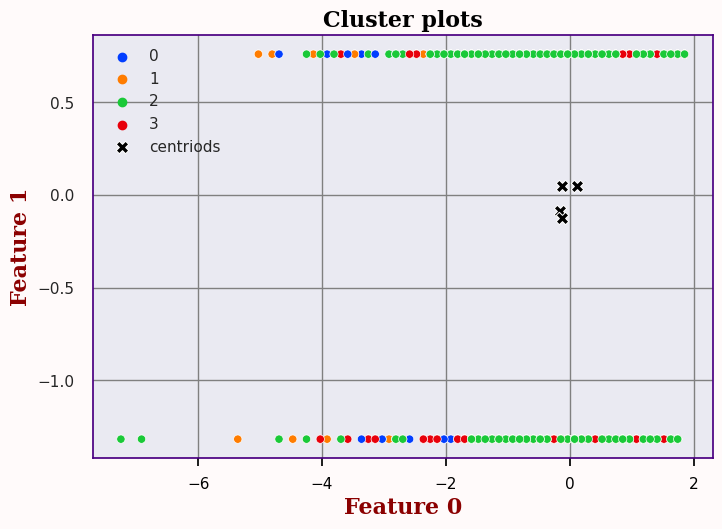

In [133]:
cluster_plots(scaled_data_frame,0,1,clusters=my_clusters)

In [162]:
def threed_cluster_plots(data,x:int,y:int,z:int, clusters):
    try:
        fig = px.scatter_3d(data,
                            x=data[:,x],
                            y=data[:,y],
                            z=data[:,z],
                            opacity=1,
                            size_max=18,
                            symbol=clusters.labels_,
                            color=clusters.labels_) # color=km.labels_, symbol=km.labels_

        fig.update_layout(scene = dict(
                            xaxis_title='Feature 1',
                            yaxis_title='Feature 2',
                            zaxis_title='Others Features'),
                            width=700,
                            margin=dict(r=20, b=10, l=10, t=10)
                            )

        # Hide colorbar axis
        fig.update_layout(coloraxis_showscale=False)
        # fig.update_traces(marker={'colorbar_xpad':0,
        #                         'showscale':False})

        fig.show()
    except Exception as e:
        print(e)

In [163]:
threed_cluster_plots(scaled_data,0,1,2,clusters=my_clusters)

**Append cluster values back into a copy of the original data**

In [258]:
data_copied_with_clusters = data.copy()

In [259]:
data_copied_with_clusters['clusters'] = my_clusters.labels_

In [260]:
data_copied_with_clusters.head()

,vehicle_id,vehicle_type,vehicle_desc,make_id,make_name,make_type,model_year,color,date_stolen,year_stolen,month_stolen,location_id,region,country,population,density,area,clusters
0,1,Trailer,BST2021D,623,Trailer,Standard,2021,Silver,2021-11-05,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978,0
1,3,Boat Trailer,ASD JETSKI,623,Trailer,Standard,2021,Silver,2022-02-13,2022,Feburary,102,Auckland,New Zealand,1695200,343.09,4940.978,0
2,5,Trailer,D-MAX 8X5,623,Trailer,Standard,2018,Silver,2022-01-10,2022,January,102,Auckland,New Zealand,1695200,343.09,4940.978,0
3,17,Trailer,BSTB85B,623,Trailer,Standard,2021,Silver,2021-10-10,2021,October,102,Auckland,New Zealand,1695200,343.09,4940.978,0
4,24,Trailer - Heavy,CT DIG 25,623,Trailer,Standard,2021,Silver,2021-11-12,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978,0


**Perform EDA on clusters**

In [179]:
def condition_printer(data, condition):
    return data.loc[condition,:]

In [182]:
cond = (data_copied_with_clusters.clusters == 1)
my_cond = condition_printer(data_copied_with_clusters,cond)
my_cond.head()

,vehicle_id,vehicle_type,vehicle_desc,make_id,make_name,make_type,model_year,color,date_stolen,year_stolen,month_stolen,location_id,region,country,population,density,area,clusters
1893,7,Trailer,CAAR TRANSPORTER,623,Trailer,Standard,2021,Silver,2021-11-12,2021,November,114,Canterbury,New Zealand,655000,14.72,44497.283,1
1894,20,Boat Trailer,APS SEADOO,623,Trailer,Standard,2018,Silver,2021-11-08,2021,November,114,Canterbury,New Zealand,655000,14.72,44497.283,1
1895,23,Trailer,LOCAL,623,Trailer,Standard,2015,Silver,2022-01-27,2022,January,114,Canterbury,New Zealand,655000,14.72,44497.283,1
1896,50,Trailer,M J TANDEM AXLE,623,Trailer,Standard,2021,Silver,2022-01-20,2022,January,114,Canterbury,New Zealand,655000,14.72,44497.283,1
1897,69,Trailer,PMTRAILER,623,Trailer,Standard,2014,Silver,2022-01-24,2022,January,114,Canterbury,New Zealand,655000,14.72,44497.283,1


In [240]:
(data_copied_with_clusters.clusters.
 value_counts().
 to_frame('count').reset_index().
 rename(columns={'index':"clusters"}).sort_values('count',ascending=False)
 )

,clusters,count
0,0,2413
1,3,775
2,2,664
3,1,657


In [261]:
data_copied_with_clusters.head()

,vehicle_id,vehicle_type,vehicle_desc,make_id,make_name,make_type,model_year,color,date_stolen,year_stolen,month_stolen,location_id,region,country,population,density,area,clusters
0,1,Trailer,BST2021D,623,Trailer,Standard,2021,Silver,2021-11-05,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978,0
1,3,Boat Trailer,ASD JETSKI,623,Trailer,Standard,2021,Silver,2022-02-13,2022,Feburary,102,Auckland,New Zealand,1695200,343.09,4940.978,0
2,5,Trailer,D-MAX 8X5,623,Trailer,Standard,2018,Silver,2022-01-10,2022,January,102,Auckland,New Zealand,1695200,343.09,4940.978,0
3,17,Trailer,BSTB85B,623,Trailer,Standard,2021,Silver,2021-10-10,2021,October,102,Auckland,New Zealand,1695200,343.09,4940.978,0
4,24,Trailer - Heavy,CT DIG 25,623,Trailer,Standard,2021,Silver,2021-11-12,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978,0


In [282]:
# data_copied_with_clusters.groupby(['vehicle_type','clusters'])['clusters'].count().to_frame("clusters_count") # too many values

In [263]:
# data_copied_with_clusters.groupby(['clusters','make_type'])['clusters'].count().sort_values(ascending=False).to_frame("clusters_count")
data_copied_with_clusters.groupby(['clusters','make_type'])['clusters'].count().to_frame("clusters_count")

clusters_count
clusters make_type                
0        Luxury                134
         Standard             2279
1        Luxury                 20
         Standard              637
2        Luxury                 13
         Standard              651
3        Luxury                 22
         Standard              753

In [281]:
# data_copied_with_clusters.groupby(['month_stolen','clusters'])['clusters'].count().to_frame("clusters_count") # too many values

In [266]:
data_copied_with_clusters.groupby(['clusters','year_stolen'])['clusters'].count().to_frame("clusters_count")

clusters_count
clusters year_stolen                
0        2021                    824
         2022                   1589
1        2021                    268
         2022                    389
2        2021                    227
         2022                    437
3        2021                    330
         2022                    445

In [280]:
# data_copied_with_clusters.groupby(['color','clusters'])['clusters'].count().to_frame("clusters_count") # too man values

In [268]:
data_copied_with_clusters.groupby(['clusters','region'])['clusters'].count().to_frame("clusters_count")

clusters_count
clusters region                            
0        Auckland                      1620
         Gisborne                       173
         Nelson                          91
         Taranaki                       112
         Wellington                     417
1        Canterbury                     657
2        Manawatū-Whanganui             138
         Otago                          135
         Southland                       26
         Waikato                        365
3        Bay of Plenty                  442
         Hawke's Bay                    100
         Northland                      233

**Visuals**

In [269]:
# a better version taken from my taxi_cab project
def plotting_count(data:pd.DataFrame,x:str,hue:str=None):    
    try:

        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')

        ordering = data[x].value_counts()
        sns.countplot(data=data,x=x,hue=hue,
            order=ordering.sort_values().index[::-1], # descending order
        )
        
        ax.set_title(f"{x} count plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.set_ylabel(f"Count",fontdict=font_label)

        ax.tick_params(axis='x', rotation=90,labelsize=20)
        plt.legend(loc="upper right")

    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')

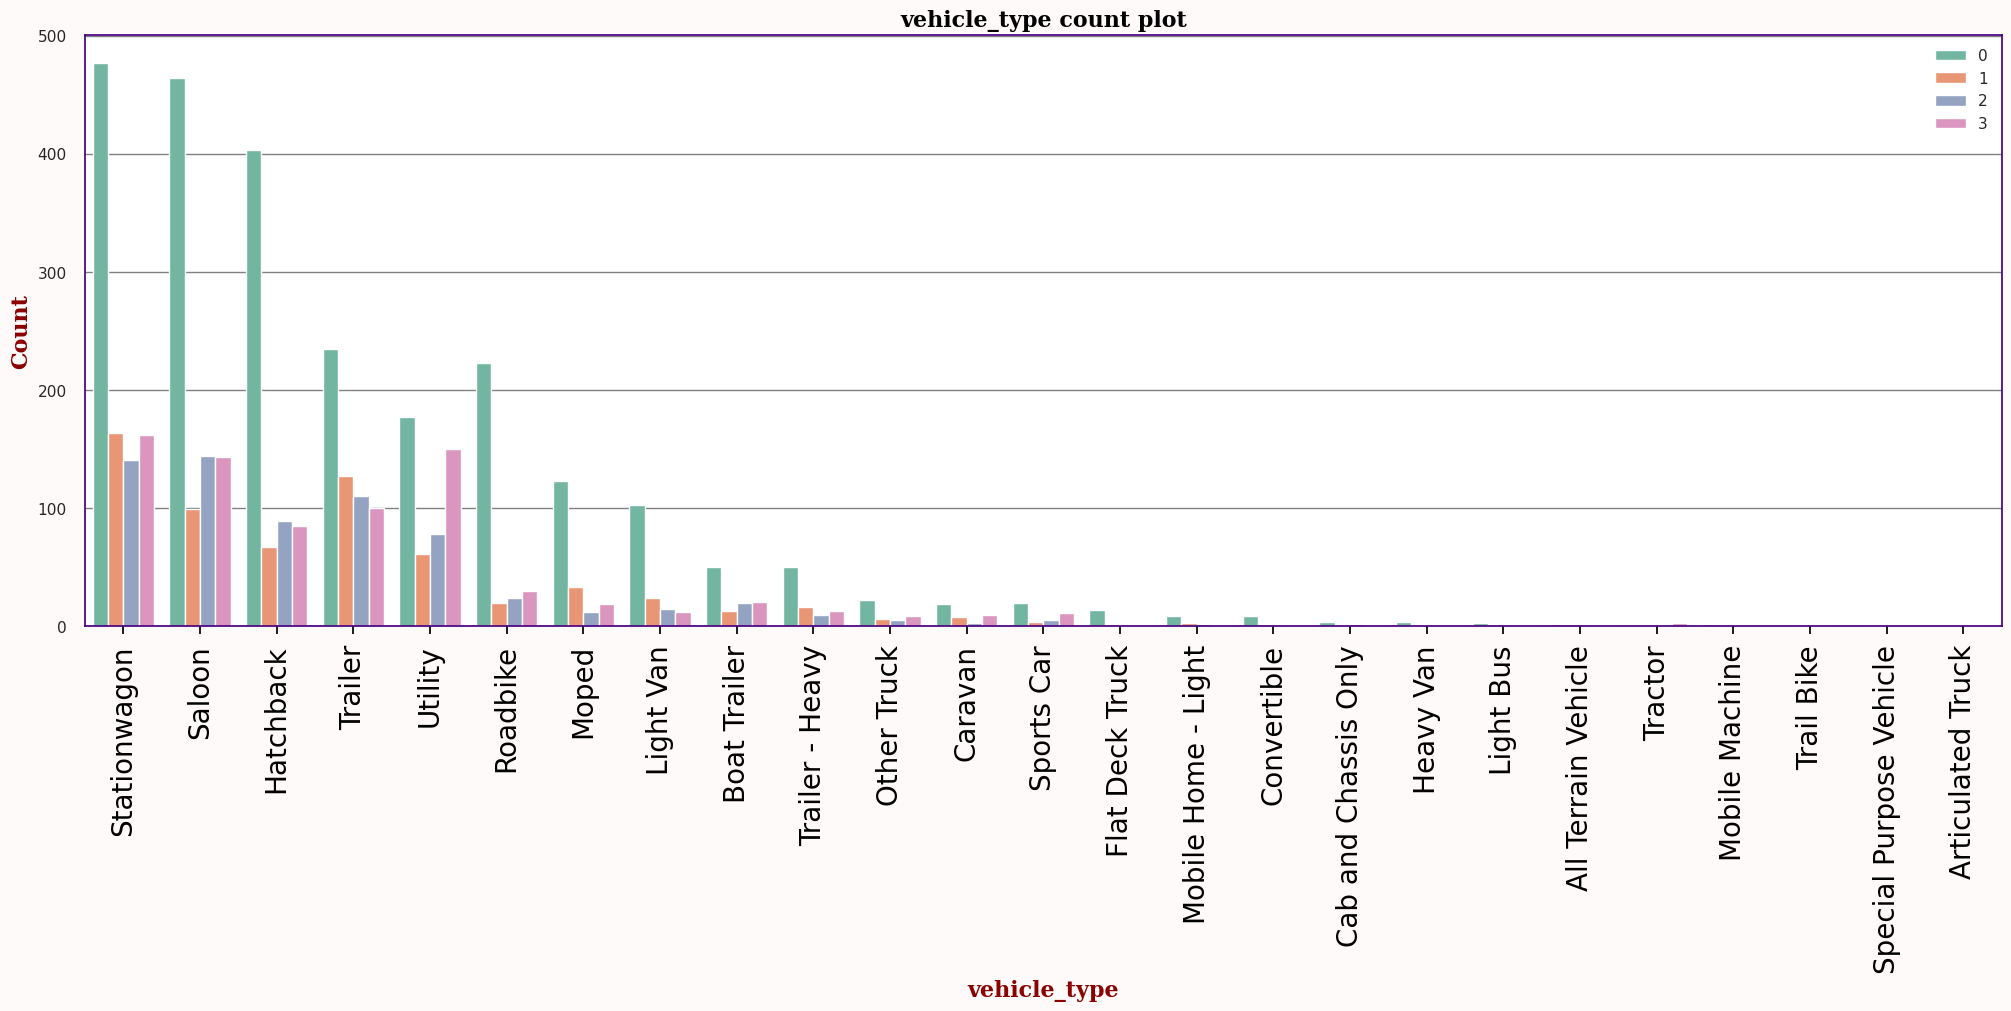

In [270]:
plotting_count(data_copied_with_clusters,"vehicle_type",'clusters')

In [271]:
# plotting_count(data_copied_with_clusters,"make_name",'clusters') # too may values

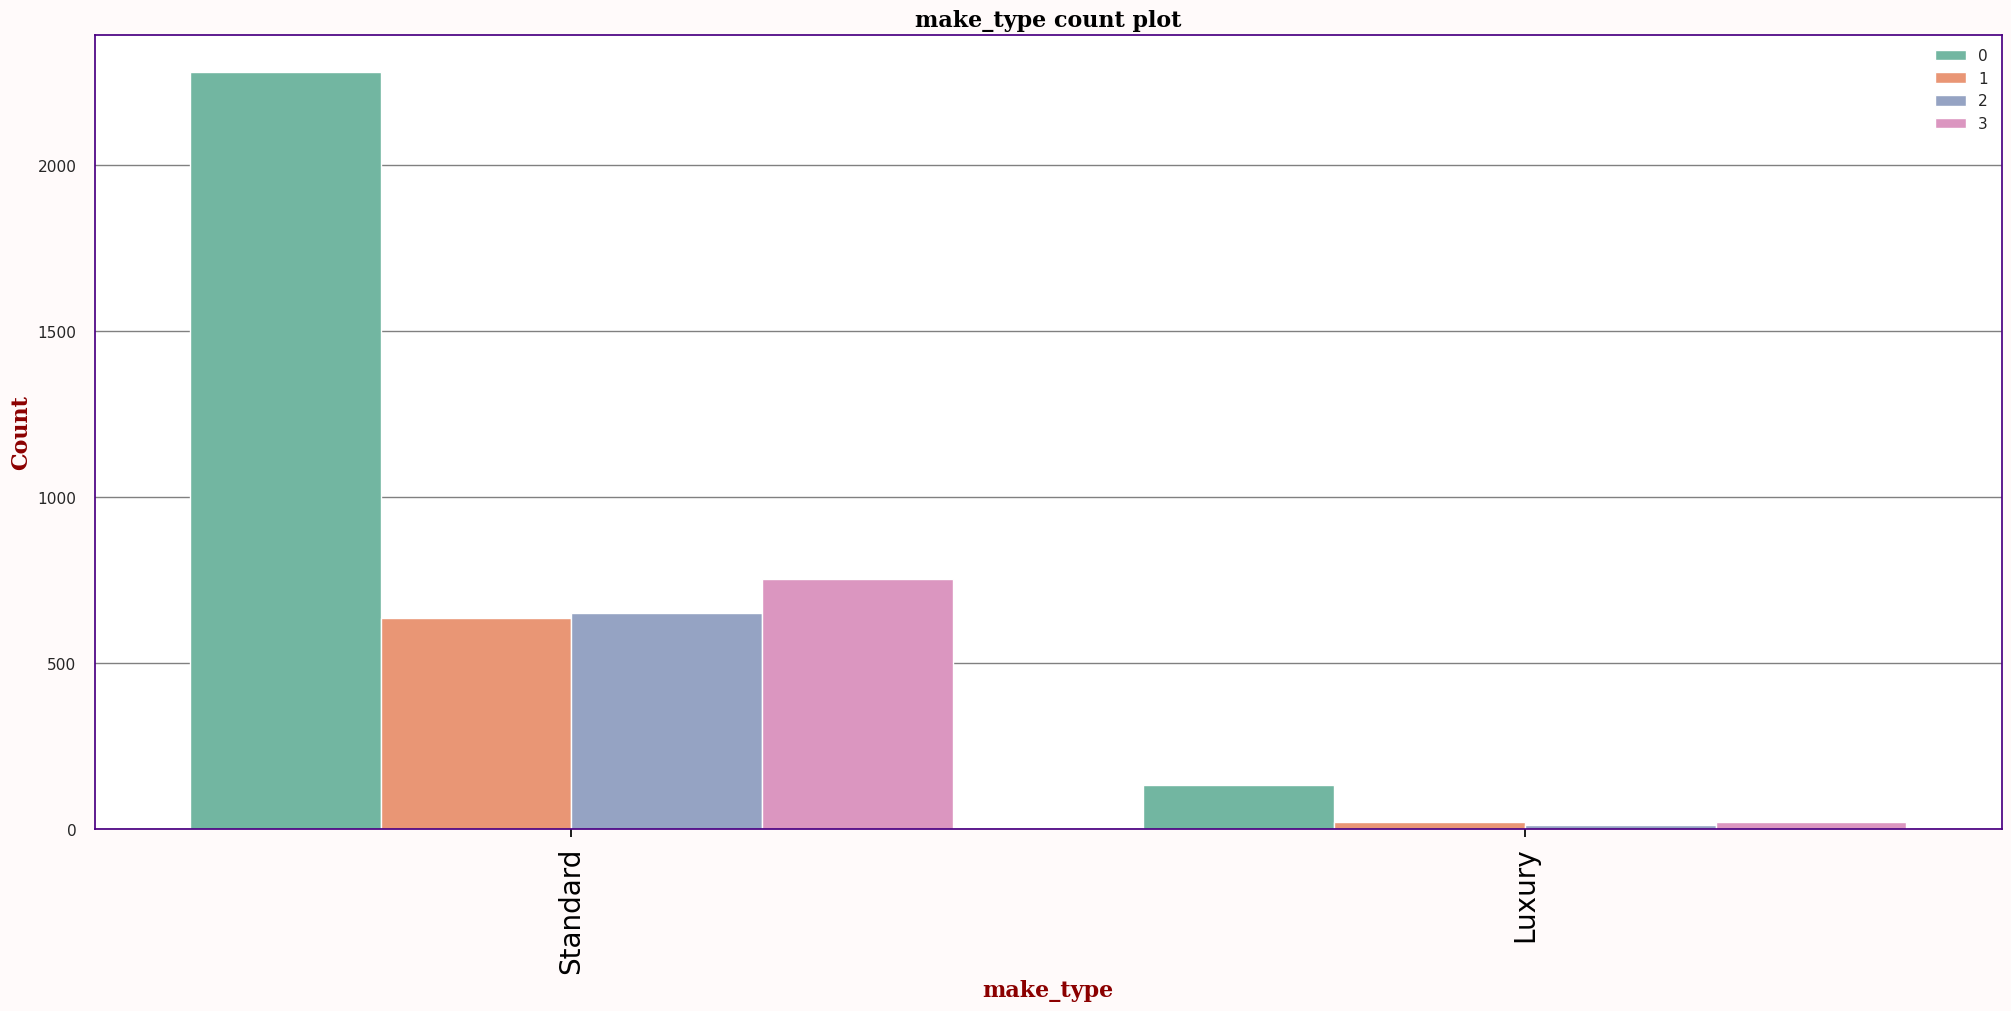

In [272]:
plotting_count(data_copied_with_clusters,"make_type",'clusters')

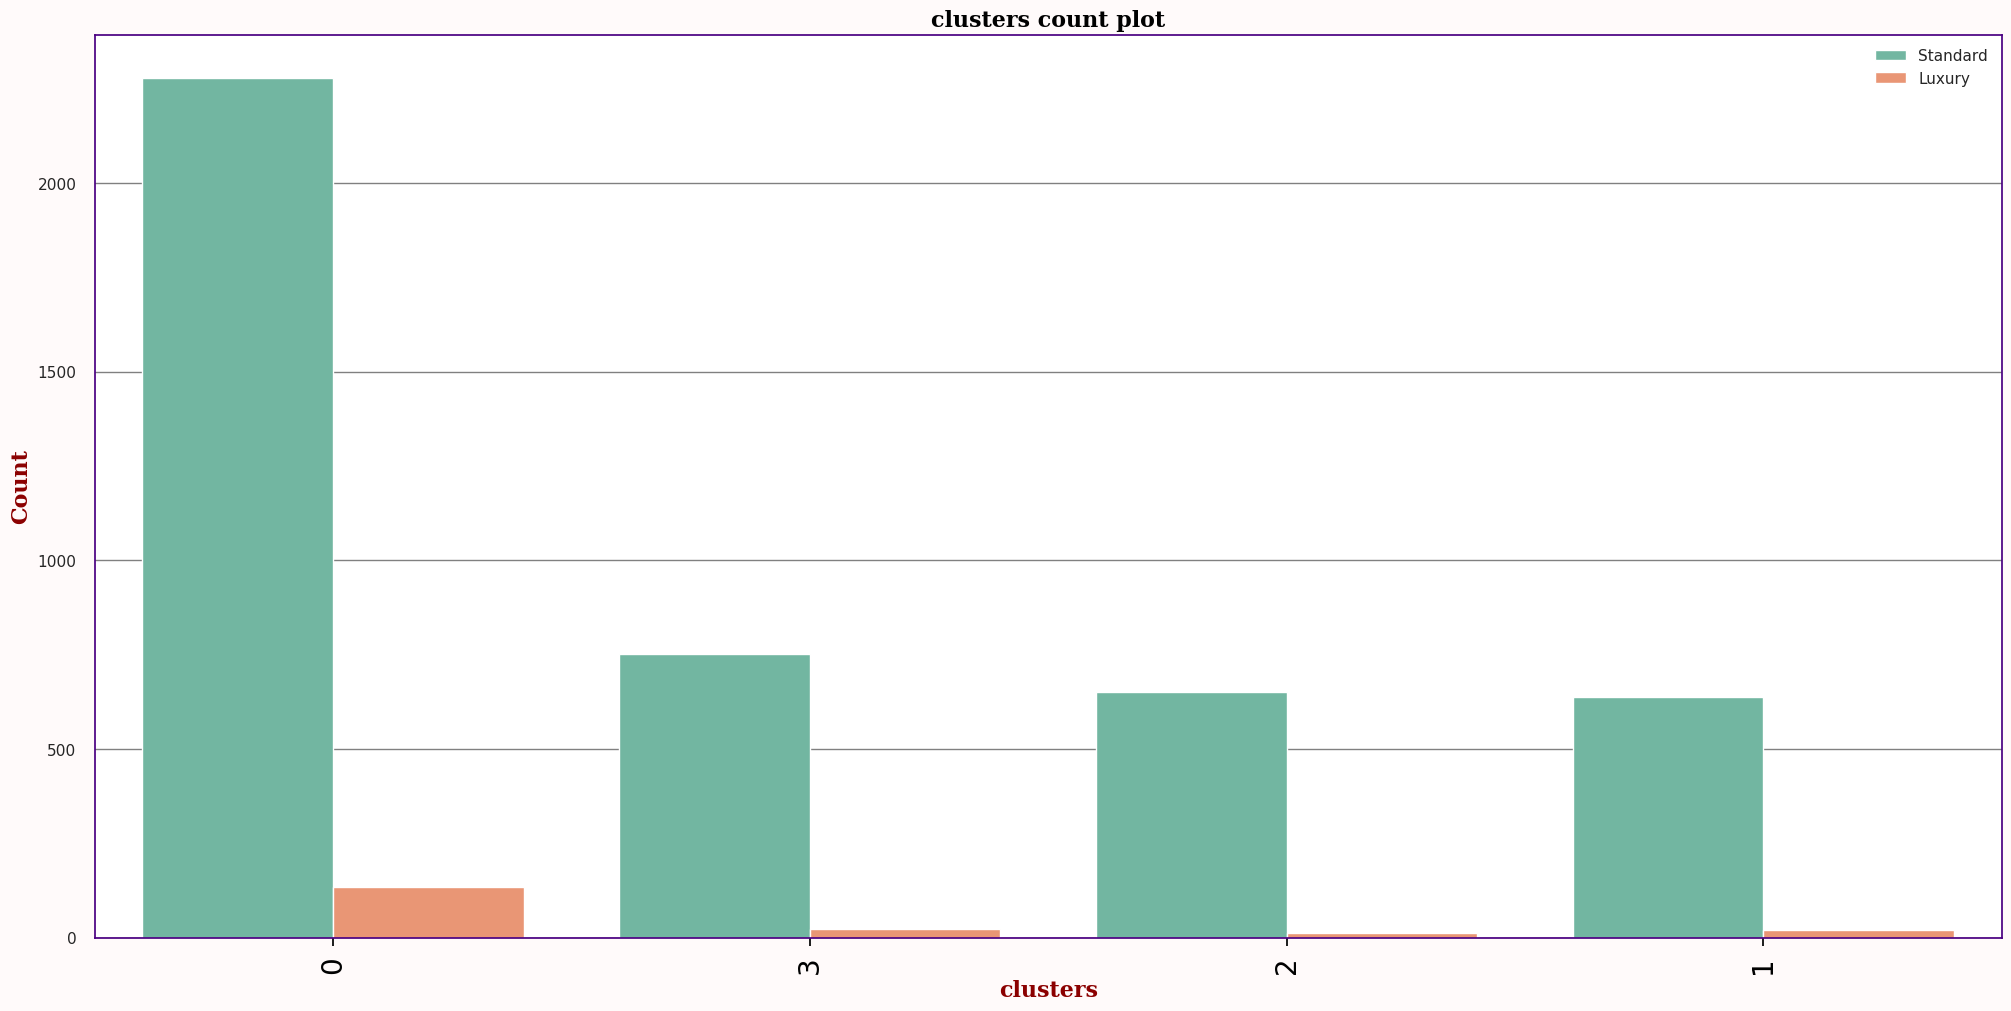

In [273]:
plotting_count(data_copied_with_clusters,"clusters",'make_type')

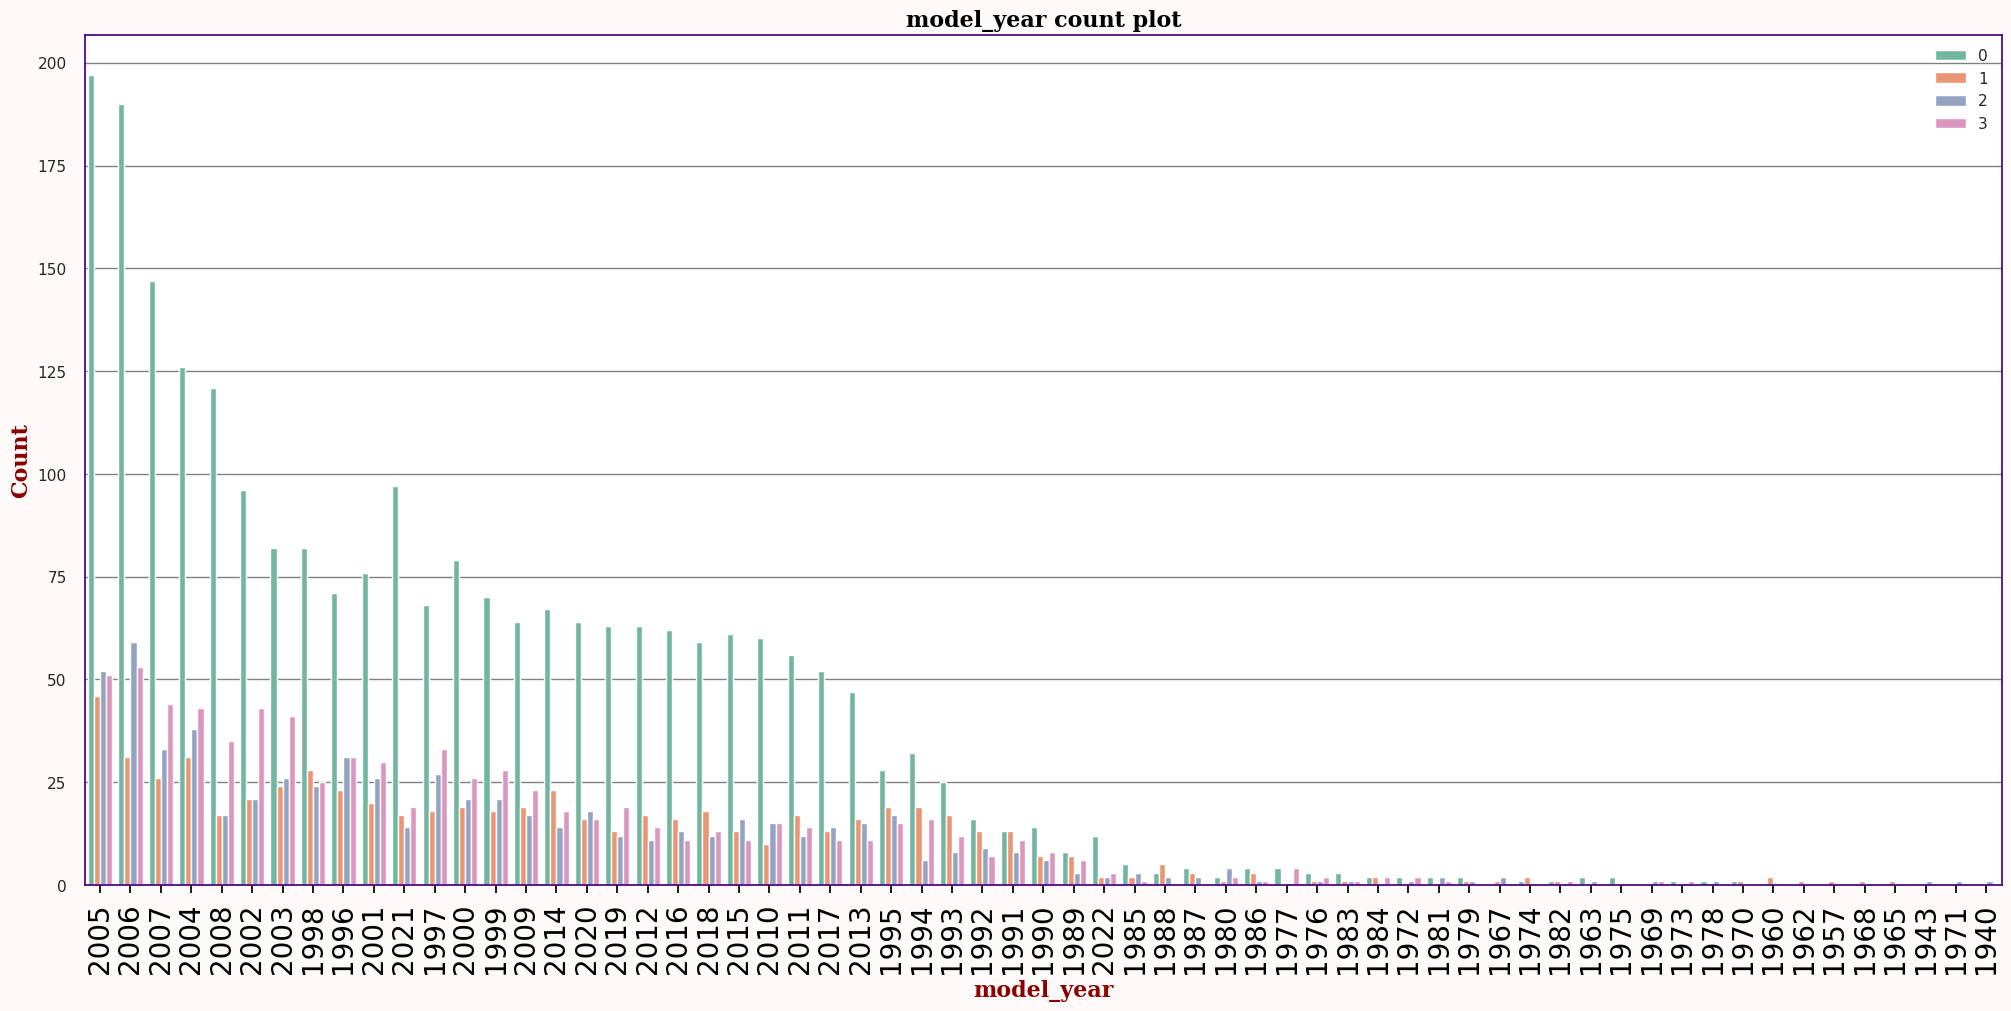

In [274]:
plotting_count(data_copied_with_clusters,"model_year",'clusters')

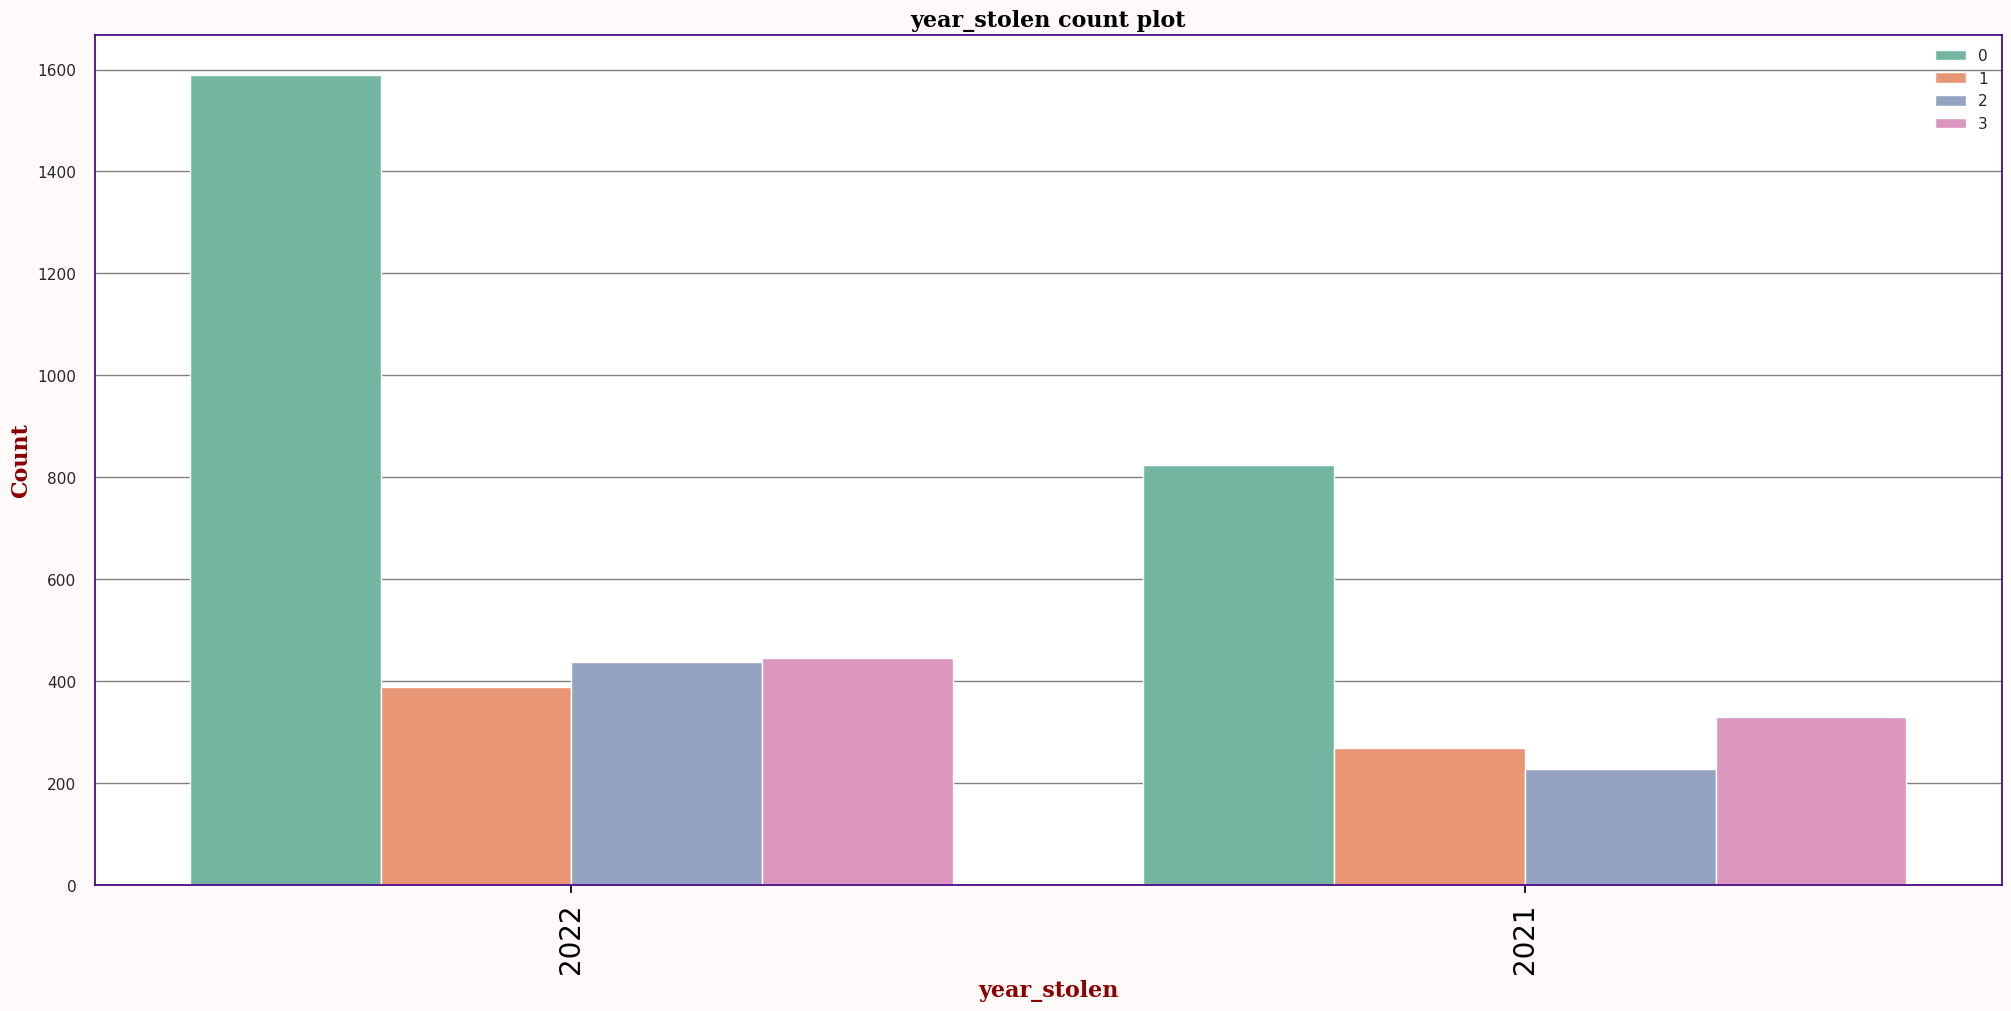

In [283]:
plotting_count(data_copied_with_clusters,"year_stolen",'clusters')

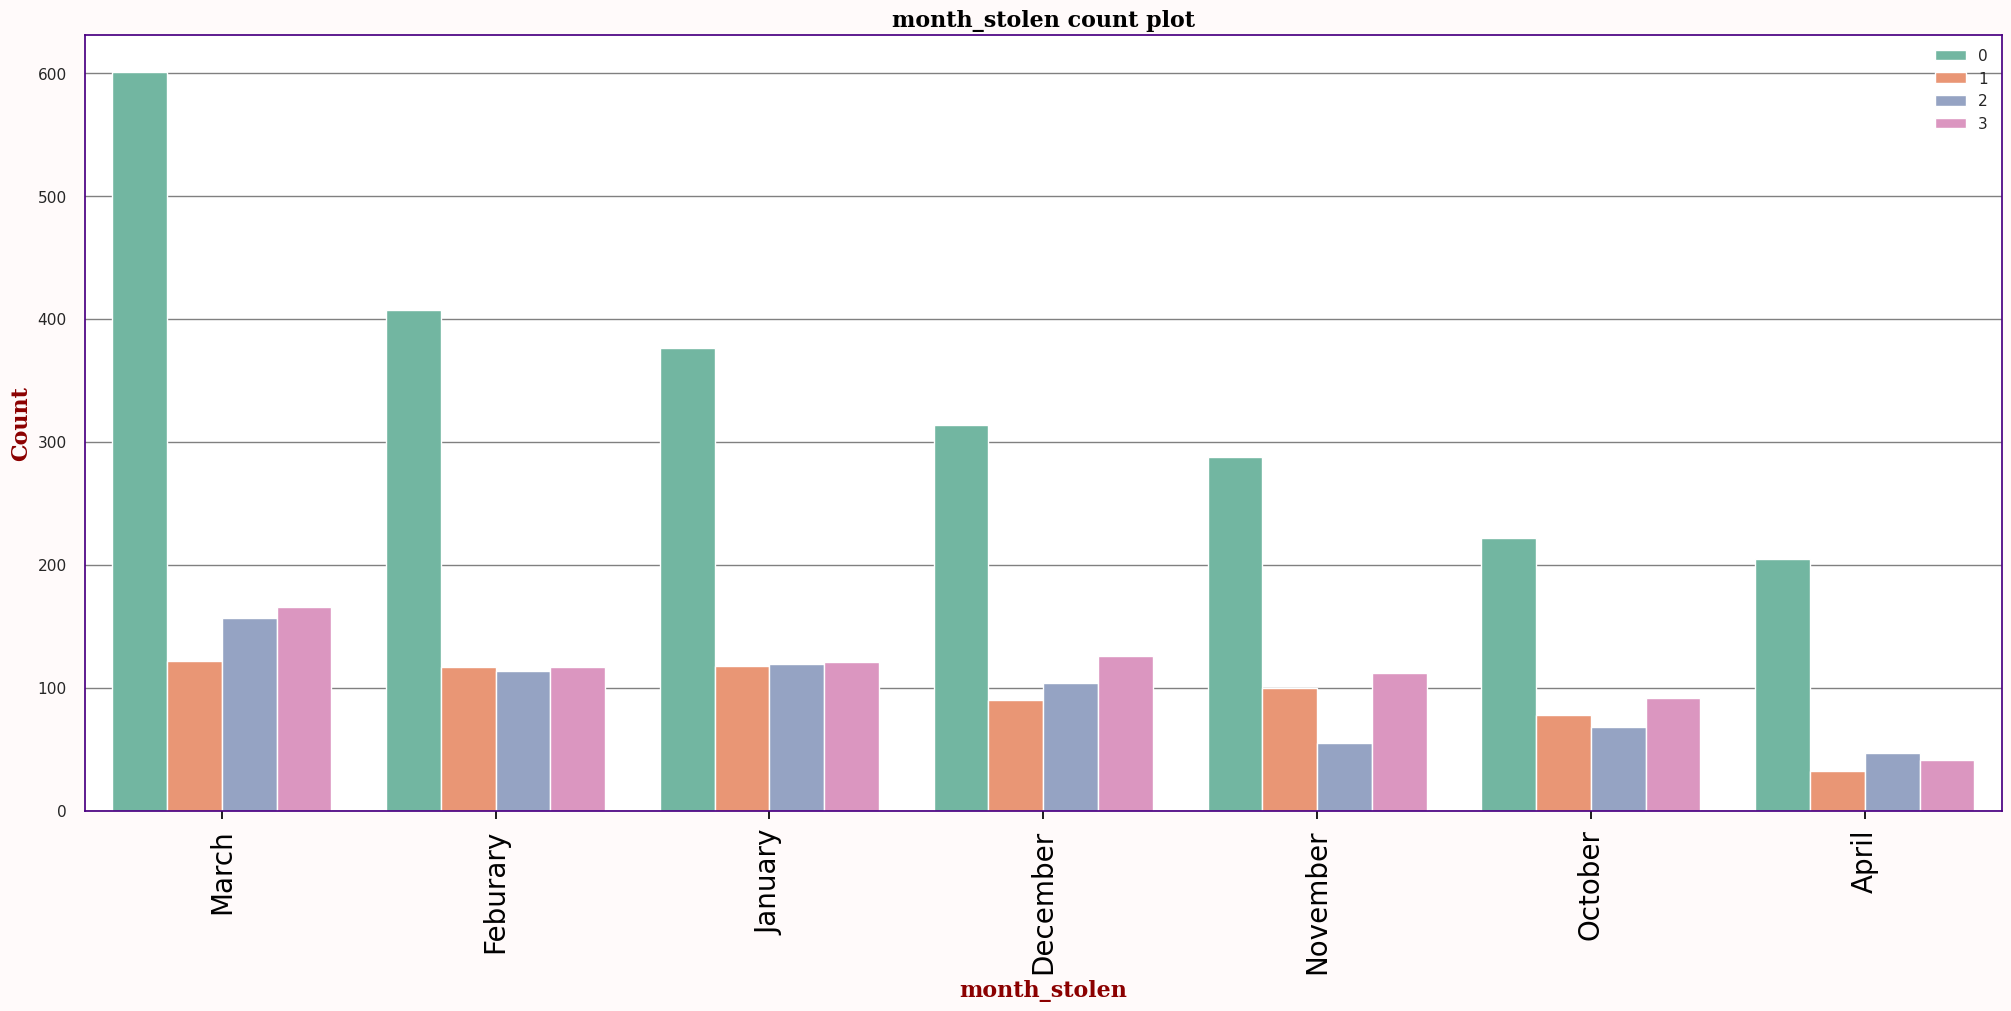

In [276]:
plotting_count(data_copied_with_clusters,"month_stolen",'clusters')

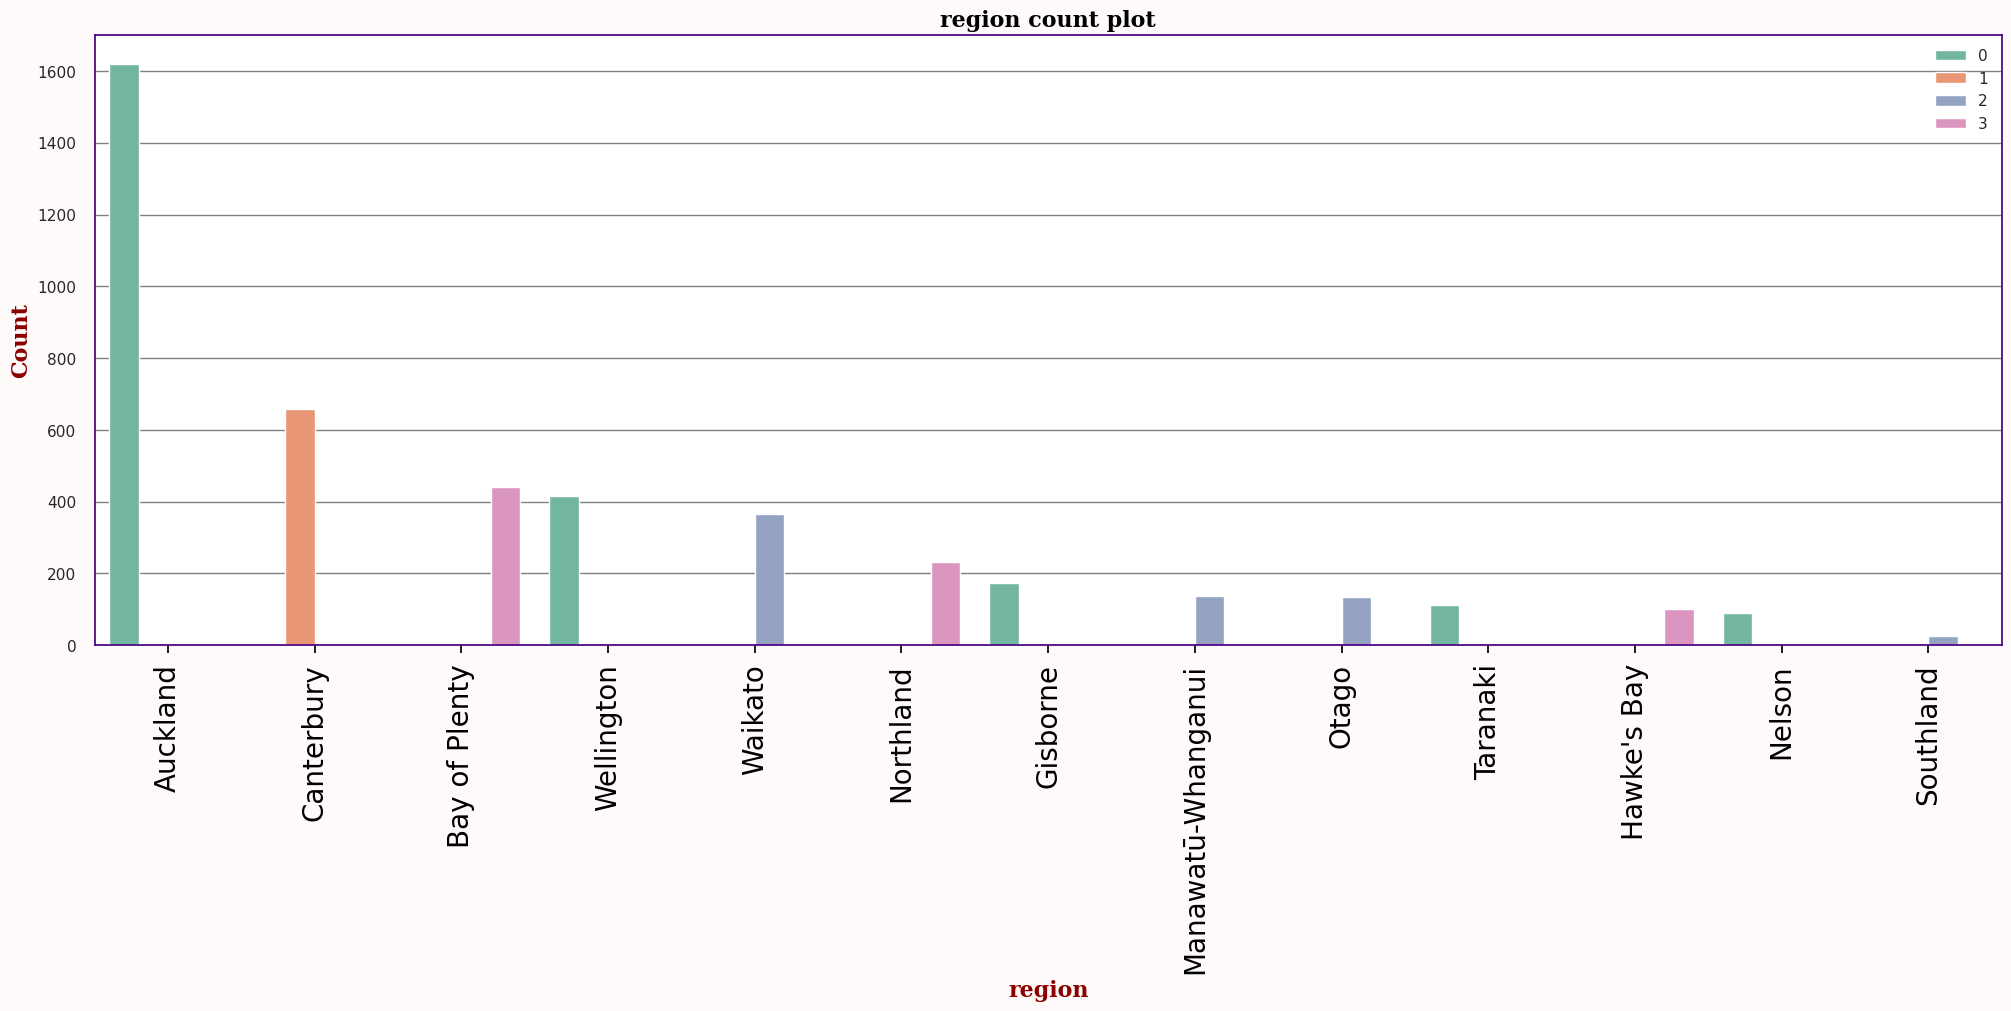

In [286]:
plotting_count(data_copied_with_clusters,"region",'clusters')

**Observations**
- Vehicle types in cluster 0 are the most stolen vehicle types with Stationwagon being the most stolen
- Vehicle make types in cluster 0 are the most stolen vehicles with Standard make types being stolen the most
- 2005 model cars in cluster 0 are the most stolen vehicles.
- Cars in cluster 0 across the years, are the most stolen vehicles
- Much cars are stolen in the month of March with cluster 0 being the highest across all months
- Cars in cluster 0 are the most stolen in the Auckland region

In [278]:
mappings = {
    0:"most_stolen",
    3:"second_most_stolen",
    2:"third_most_stolen",
    1:"least_stolen"

}
data_copied_with_clusters_named = data_copied_with_clusters.copy()
data_copied_with_clusters_named['clusters_named'] = data_copied_with_clusters_named['clusters'].map(mappings)

In [279]:
data_copied_with_clusters_named.head()

,vehicle_id,vehicle_type,vehicle_desc,make_id,make_name,make_type,model_year,color,date_stolen,year_stolen,month_stolen,location_id,region,country,population,density,area,clusters,clusters_named
0,1,Trailer,BST2021D,623,Trailer,Standard,2021,Silver,2021-11-05,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978,0,most_stolen
1,3,Boat Trailer,ASD JETSKI,623,Trailer,Standard,2021,Silver,2022-02-13,2022,Feburary,102,Auckland,New Zealand,1695200,343.09,4940.978,0,most_stolen
2,5,Trailer,D-MAX 8X5,623,Trailer,Standard,2018,Silver,2022-01-10,2022,January,102,Auckland,New Zealand,1695200,343.09,4940.978,0,most_stolen
3,17,Trailer,BSTB85B,623,Trailer,Standard,2021,Silver,2021-10-10,2021,October,102,Auckland,New Zealand,1695200,343.09,4940.978,0,most_stolen
4,24,Trailer - Heavy,CT DIG 25,623,Trailer,Standard,2021,Silver,2021-11-12,2021,November,102,Auckland,New Zealand,1695200,343.09,4940.978,0,most_stolen


In [291]:
cond1 = data_copied_with_clusters_named.clusters == 0
cond2 = data_copied_with_clusters_named.region == 'Auckland'
# cond3 = data_copied_with_clusters_named.make_type == 'Standard'
final_cond = (cond1) & (cond2) 
my_cond = condition_printer(data_copied_with_clusters_named,final_cond)
my_cond.groupby('make_type')['make_type'].count().to_frame("make_type_count").reset_index()

,make_type,make_type_count
0,Luxury,113
1,Standard,1507


So most cars stolen in Auckland with cluster 0 are of **Standard** make_type

In [297]:
cond1 = data_copied_with_clusters_named.clusters == 1
cond2 = data_copied_with_clusters_named.region == 'Canterbury'
# cond3 = data_copied_with_clusters_named.make_type == 'Standard'
final_cond = (cond1) & (cond2) 
my_cond = condition_printer(data_copied_with_clusters_named,final_cond)
my_cond.groupby('make_type')['make_type'].count().to_frame("make_type_count").reset_index()

,make_type,make_type_count
0,Luxury,20
1,Standard,637


In [305]:
data_copied_with_clusters_named.groupby(['region','make_type','clusters','clusters_named'])['clusters'].count().to_frame("cluster_count")

cluster_count
region             make_type clusters clusters_named                   
Auckland           Luxury    0        most_stolen                   113
                   Standard  0        most_stolen                  1507
Bay of Plenty      Luxury    3        second_most_stolen             14
                   Standard  3        second_most_stolen            428
Canterbury         Luxury    1        least_stolen                   20
                   Standard  1        least_stolen                  637
Gisborne           Luxury    0        most_stolen                     4
                   Standard  0        most_stolen                   169
Hawke's Bay        Luxury    3        second_most_stolen              2
                   Standard  3        second_most_stolen             98
Manawatū-Whanganui Luxury    2        third_most_stolen               4
                   Standard  2        third_most_stolen             134
Nelson             Luxury    0        most_stolen                     2
                   Standard  0        most_stolen                    89
Northland          Luxury    3        second_most_stolen              6
                   Standard  3        second_most_stolen            227
Otago              Luxury    2        third_most_stolen               4
                   Standard  2        third_most_stolen             131
Southland          Standard  2        third_most_stolen              26
Taranaki           Luxury    0        most_stolen                     3
                   Standard  0        most_stolen                   109
Waikato            Luxury    2        third_most_stolen               5
                   Standard  2        third_most_stolen             360
Wellington         Luxury    0        most_stolen                    12
                   Standard  0        most_stolen                   405

**Further Observations**
- Each region has one cluster type
- There are five regions which cluster 0

In [308]:
# The regions with most stolen vehicles
cond1 = data_copied_with_clusters_named.clusters == 0  
my_cond = condition_printer(data_copied_with_clusters_named,cond1)
my_cond.region.unique().tolist()

['Auckland', 'Gisborne', 'Wellington', 'Taranaki', 'Nelson']

# **Conclusion**

- Action should be taken to reduce car thefts for those in cluster 0, because it's clear they are the most stolen vehicles; 2413 thefts.